In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1_credit-card-default.csv")
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2.0,-1,-1,...,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2.0,0,0,...,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0.0,0,0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0.0,0,0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0.0,-1,0,...,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0


In [3]:
df.rename(columns={"PAY_0":"PAY_1"},inplace=True)

for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors="coerce")
    
df.dtypes

ID             int64
LIMIT_BAL      int64
GENDER         int64
EDUCATION    float64
MARRIAGE     float64
AGE          float64
PAY_1        float64
PAY_2        float64
PAY_3          int64
PAY_4        float64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1       int64
PAY_AMT2       int64
PAY_AMT3       int64
PAY_AMT4       int64
PAY_AMT5       int64
PAY_AMT6       int64
defaulted      int64
dtype: object

In [4]:
tmp = df.isnull().sum()
for i in tmp[tmp>0].index:
    df.loc[df[i].isna(), i] = df[i].median()

In [12]:
df[df.defaulted==1].EDUCATION.value_counts()

2.0    3332
1.0    2035
3.0    1236
5.0      18
6.0       8
4.0       7
Name: EDUCATION, dtype: int64

In [15]:
df.EDUCATION = df.EDUCATION.astype(int)
df.MARRIAGE = df.MARRIAGE.astype(int)
df.AGE = df.AGE.astype(int)
df.PAY_1 = df.PAY_1.astype(int)
df.PAY_2 = df.PAY_2.astype(int)
df.PAY_3 = df.PAY_3.astype(int)
df.PAY_4 = df.PAY_4.astype(int)
df.PAY_5 = df.PAY_5.astype(int)
df.PAY_6 = df.PAY_6.astype(int)

In [18]:
df.EDUCATION.value_counts()

2    14038
1    10579
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [29]:
#num_cols = ["LIMIT_BAL","AGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","defaulted"]
cat_cols = ["GENDER","MARRIAGE","EDUCATION"]

#df_dummies = pd.get_dummies(df[num_cols + cat_cols], columns = cat_cols, prefix = cat_cols, drop_first=True)
df_dummies = pd.get_dummies(df, columns = cat_cols, prefix = cat_cols, drop_first=True)

In [30]:
df_dummies

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,GENDER_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,1,20000,24,2,2,-1,-1,-2,-2,3913.0,...,1,1,0,0,0,1,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682.0,...,1,0,1,0,0,1,0,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239.0,...,1,0,1,0,0,1,0,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990.0,...,1,1,0,0,0,1,0,0,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948.0,...,0,1,0,0,0,0,1,0,0,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683.0,...,0,0,1,0,0,0,1,0,0,0
29997,29998,30000,37,4,3,2,-1,0,0,3565.0,...,0,0,1,0,0,1,0,0,0,0
29998,29999,80000,41,1,-1,0,0,0,-1,-1645.0,...,0,1,0,0,0,0,1,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met # import accuracy_score

In [32]:
X = df_dummies.drop(columns=["defaulted"])
y = df_dummies.defaulted
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(24000, 31)
(6000, 31)


In [34]:
rf = RandomForestClassifier()
# gb = GradientBoostingClassifier()
# svc = SVC()
# lr = LogisticRegression()

In [39]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#accuracy_score(y_test,y_pred)

met.precision_score(y_test,y_pred)

0.6472972972972973

In [40]:
met.confusion_matrix(y_test,y_pred)

array([[4426,  261],
       [ 834,  479]])

In [42]:
print(met.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



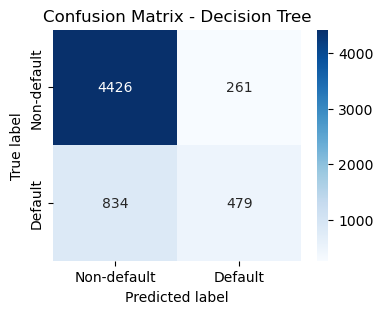

In [43]:
plt.figure(figsize=(4,3))
ConfMatrix = met.confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

In [50]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.preprocessing import MinMaxScaler

data_for_norm = df_dummies.drop("defaulted", axis=1)
minmax = MinMaxScaler()
data_for_norm = minmax.fit_transform(data_for_norm)

In [48]:
X = data_for_norm
y = df.defaulted
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]
             }

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, scoring='average_precision', param_distributions=param_dist, cv=5, random_state=0,verbose=1)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


In [61]:
tree_cv.best_params_

{'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}

In [62]:
rf = RandomForestClassifier(criterion='gini',min_samples_leaf=2, max_features=9,max_depth=7)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(met.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.68      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [64]:
def show_res_rep(y_test,y_pred):
    print(met.classification_report(y_test,y_pred))
    plt.figure(figsize=(4,3))
    ConfMatrix = met.confusion_matrix(y_test,y_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
                xticklabels = ['Non-default', 'Default'],
                yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix - Decision Tree")


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



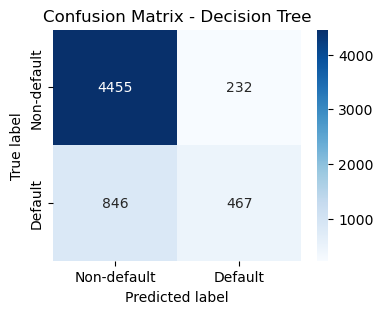

In [70]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
show_res_rep(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4687
           1       0.67      0.26      0.38      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.79      0.81      0.78      6000



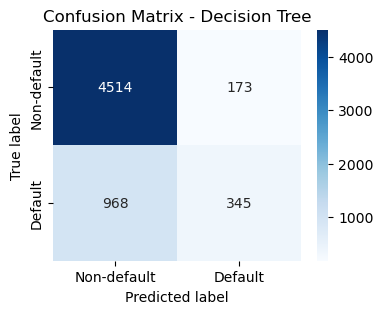

In [71]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
show_res_rep(y_test,y_pred)

/Users/kartik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.71      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



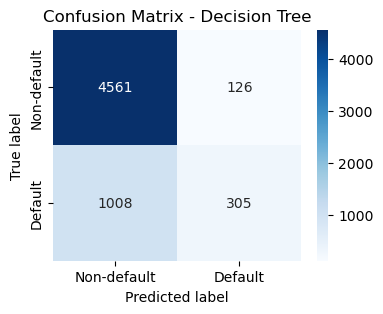

In [73]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
show_res_rep(y_test,y_pred)

In [74]:
import xgboost as xgb


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



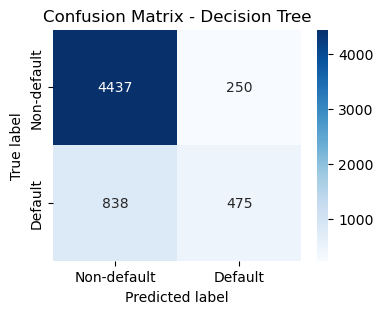

In [75]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
show_res_rep(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



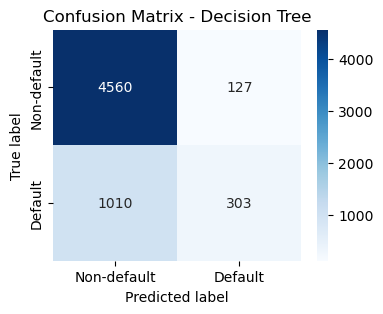

In [76]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
show_res_rep(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4687
           1       0.54      0.32      0.41      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.62      0.64      6000
weighted avg       0.77      0.79      0.77      6000



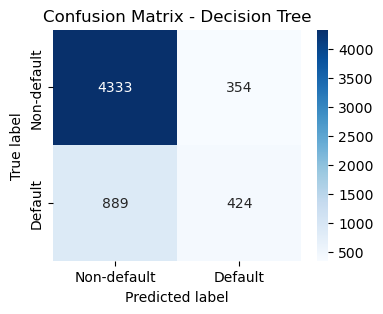

In [89]:
from sklearn.neighbors import KNeighborsClassifier

K = 5
knn_model = KNeighborsClassifier(n_neighbors = K)
knn_model.fit(X_train, y_train) 
y_pred = knn_model.predict(X_test)
show_res_rep(y_test,y_pred)